In [5]:

import pandas as pd


import re
import os
import base64
import io 
import numpy as np

from matplotlib import pyplot as plt
from matplotlib import cm
import seaborn as sns
import os
prefix = "sc_integration_yli11_2021-04-25"


In [16]:


def read_pkl(f):
	df = pd.read_pickle(f).T
	df.index = [x.upper() for x in df.index.tolist()]
	return df

# {'curveNumber': 2, 'pointNumber': 7957, 'pointIndex': 7957, 'x': 11.368506461507693, 'y': 14.010178404020541, 'marker.color': 3.551056385040283, 'customdata': ['WT_CD34_Diff_D7-TTCCACGGTCATGACT', 3230, 14772, 11]},
df = pd.read_csv("%s_Harmony_UMAP.csv"%(prefix))
df.index = df.barcodekey.tolist()
rna_df = read_pkl("%s.rna.log_norm.pkl"%(prefix))
antibody_df = read_pkl("%s.antibody.log_norm.pkl"%(prefix))
# antibody_df = antibody_df.transform(lambda x:np.log2(x+1))
antibody_list = antibody_df.index.tolist()


In [28]:
antibody_df.head()

,mNFIXko-AAACCCACATCCGGTG,mNFIXko-AAACCCAGTATCAGGG,mNFIXko-AAACCCATCATGTCAG,mNFIXko-AAACCCATCCACGTAA,mNFIXko-AAACCCATCGGACGTC,mNFIXko-AAACCCATCTGGGCGT,mNFIXko-AAACGAAAGGAAGAAC,mNFIXko-AAACGAACACACCTGG,mNFIXko-AAACGAACAGGCCCTA,mNFIXko-AAACGAAGTGTCTTCC,...,mWT-TTTGGTTTCCATCACC,mWT-TTTGGTTTCGTCGCTT,mWT-TTTGGTTTCTATCGTT,mWT-TTTGTTGAGAGAAGGT,mWT-TTTGTTGCAATCGCAT,mWT-TTTGTTGCACACGGTC,mWT-TTTGTTGGTCGAGCTC,mWT-TTTGTTGGTCGTGATT,mWT-TTTGTTGTCATCGACA,mWT-TTTGTTGTCATTGTGG
SCA1_TOTALA,36,2,37,5,9,1,9,20,57,7,...,4,76,8,55,8,2,43,62,33,9
CD150_TOTALA,2,4,1,11,3,22,2,75,9,3,...,5,44,2,4,3,1,6,3,156,0
CD48_TOTALA,10,46,64,7,35,29,55,8,36,4,...,6,6,95,13,51,42,48,22,1,2
CD16_32_TOTALA,16,73,90,8,60,12,82,19,16,13,...,1,26,27,26,144,36,19,37,0,1
CD105_TOTALA,11,11,4,64,9,4,3,26,42,89,...,26,20,10,21,0,12,14,7,30,25


In [44]:
t1 = pd.read_csv("WT_ADT_CLR_norm.csv")
t1.columns = ["mWT-"+x.split("-")[0] for x in t1.columns]
t2 = pd.read_csv("KO_ADT_CLR_norm.csv")
t2.columns = ["mNFIXko-"+x.split("-")[0] for x in t2.columns]
t = pd.concat([t1,t2],axis=1)
t.head()

,mWT-AAACCCAAGTGATCGG,mWT-AAACCCACAAACCATC,mWT-AAACCCACACTGTCCT,mWT-AAACCCACAGCCATTA,mWT-AAACCCAGTACCTAAC,mWT-AAACCCAGTCCTCCTA,mWT-AAACCCAGTGAATTAG,mWT-AAACCCAGTTCTCTCG,mWT-AAACCCATCAAATGAG,mWT-AAACCCATCTGTCCCA,...,mNFIXko-TTTGGTTGTGGCAACA,mNFIXko-TTTGGTTTCAACACCA,mNFIXko-TTTGGTTTCGATACGT,mNFIXko-TTTGGTTTCTCCAAGA,mNFIXko-TTTGTTGAGACCAAGC,mNFIXko-TTTGTTGCAAGTGGGT,mNFIXko-TTTGTTGCACGCTATA,mNFIXko-TTTGTTGCAGTAACCT,mNFIXko-TTTGTTGCATCGGAGA,mNFIXko-TTTGTTGGTACCAATC
Sca1,1.141346,2.096640,0.587296,1.382128,1.690425,0.587296,1.014527,0.427060,0.316941,1.014527,...,0.263233,0.351771,1.010348,0.433103,0.058482,0.308482,2.440549,0.263233,1.389117,0.393263
CD150,0.791573,1.593778,0.407370,0.878800,2.403082,1.439434,2.213354,0.095830,0.532981,0.000000,...,0.076688,0.953239,0.983502,0.443361,0.786444,0.214397,1.289305,0.822103,0.856534,1.311023
CD48,0.000000,1.016014,0.178812,1.169077,1.983133,1.774087,1.827967,0.649046,0.231954,0.330448,...,1.923132,0.950426,0.408723,0.069645,0.623547,0.893045,0.307954,0.543067,0.584117,1.659283
CD16-32,1.214077,0.967950,0.151221,1.112080,1.164379,0.151221,1.774550,0.451960,0.151221,0.596785,...,0.943974,0.468854,0.420939,0.420939,0.261657,1.438678,0.786785,0.317618,1.153207,0.716270
CD105,0.610476,1.154797,1.176650,0.960311,1.298595,1.239480,1.389960,1.259576,1.594549,0.131220,...,0.115593,0.219198,0.515195,0.477907,0.853534,0.219198,0.477907,0.551142,0.976172,0.356896


In [40]:
len(set(t1.columns).intersection(t2.columns))

24

In [42]:
len(set(t.columns))

14067

In [43]:
df.sample(n=4)

,barcodekey,Channel,n_genes,n_counts,percent_mito,scale,Group,louvain_labels,UMAP1,UMAP2
mNFIXko-TATACCTGTAGAGTTA,mNFIXko-TATACCTGTAGAGTTA,mNFIXko,1616,3655,3.529412,27.359781,one_group,7,10.595559,0.389061
mNFIXko-CATCCCAAGAAACTCA,mNFIXko-CATCCCAAGAAACTCA,mNFIXko,3780,14347,3.603541,6.970098,one_group,7,8.870724,6.747519
mWT-TGTTGAGTCTAGCCTC,mWT-TGTTGAGTCTAGCCTC,mWT,4372,22310,3.729269,4.482496,one_group,2,15.013935,4.985722
mNFIXko-TGTGATGTCCTAGCGG,mNFIXko-TGTGATGTCCTAGCGG,mNFIXko,3003,9750,2.287179,10.256410,one_group,3,5.745470,9.801458


In [30]:
t = pd.read_csv("WT_ADT_CLR_norm.csv")
t.head()

,AAACCCAAGTGATCGG-1,AAACCCACAAACCATC-1,AAACCCACACTGTCCT-1,AAACCCACAGCCATTA-1,AAACCCAGTACCTAAC-1,AAACCCAGTCCTCCTA-1,AAACCCAGTGAATTAG-1,AAACCCAGTTCTCTCG-1,AAACCCATCAAATGAG-1,AAACCCATCTGTCCCA-1,...,TTTGGTTTCGTCGCTT-1,TTTGGTTTCTATCGTT-1,TTTGGTTTCTCCCTAG-1,TTTGTTGAGAGAAGGT-1,TTTGTTGCAATCGCAT-1,TTTGTTGCACACGGTC-1,TTTGTTGGTCGAGCTC-1,TTTGTTGGTCGTGATT-1,TTTGTTGTCATCGACA-1,TTTGTTGTCATTGTGG-1
Sca1,1.141346,2.096640,0.587296,1.382128,1.690425,0.587296,1.014527,0.427060,0.316941,1.014527,...,1.619163,0.355011,0.148268,1.368664,0.355011,0.101246,1.191132,1.459317,1.014527,0.391684
CD150,0.791573,1.593778,0.407370,0.878800,2.403082,1.439434,2.213354,0.095830,0.532981,0.000000,...,1.691049,0.183275,0.000000,0.338105,0.263684,0.095830,0.472147,0.263684,2.814764,0.000000
CD48,0.000000,1.016014,0.178812,1.169077,1.983133,1.774087,1.827967,0.649046,0.231954,0.330448,...,0.330448,1.974109,1.039368,0.614347,1.465228,1.319391,1.418939,0.890290,0.063224,0.122687
CD16-32,1.214077,0.967950,0.151221,1.112080,1.164379,0.151221,1.774550,0.451960,0.151221,0.596785,...,1.138571,1.164379,0.640747,1.138571,2.545869,1.370819,0.936452,1.391332,0.000000,0.078466
CD105,0.610476,1.154797,1.176650,0.960311,1.298595,1.239480,1.389960,1.259576,1.594549,0.131220,...,0.876377,0.531269,0.399288,0.905145,0.000000,0.610476,0.683868,0.399288,1.132457,1.012592


In [8]:
df.head()

,barcodekey,Channel,n_genes,n_counts,percent_mito,scale,Group,louvain_labels,UMAP1,UMAP2
mNFIXko-AAACCCACATCCGGTG,mNFIXko-AAACCCACATCCGGTG,mNFIXko,2155,4737,5.552037,21.114865,one_group,4,2.174418,1.942060
mNFIXko-AAACCCAGTATCAGGG,mNFIXko-AAACCCAGTATCAGGG,mNFIXko,3995,15511,2.952743,6.447453,one_group,3,4.788786,9.221168
mNFIXko-AAACCCATCATGTCAG,mNFIXko-AAACCCATCATGTCAG,mNFIXko,1268,3395,4.918999,29.489826,one_group,7,2.255671,-1.557156
mNFIXko-AAACCCATCCACGTAA,mNFIXko-AAACCCATCCACGTAA,mNFIXko,4636,25841,2.778530,3.869819,one_group,5,13.748124,5.293617
mNFIXko-AAACCCATCGGACGTC,mNFIXko-AAACCCATCGGACGTC,mNFIXko,3965,16922,3.102470,5.909467,one_group,3,4.043426,9.439455


In [9]:
df2 = pd.concat([df,antibody_df.T],axis=1)

In [10]:
df2.head()

,barcodekey,Channel,n_genes,n_counts,percent_mito,scale,Group,louvain_labels,UMAP1,UMAP2,SCA1_TOTALA,CD150_TOTALA,CD48_TOTALA,CD16_32_TOTALA,CD105_TOTALA,CD41_TOTALA,CD71_TOTALA,CD34_TOTALA
mNFIXko-AAACCCACATCCGGTG,mNFIXko-AAACCCACATCCGGTG,mNFIXko,2155,4737,5.552037,21.114865,one_group,4,2.174418,1.942060,5.209453,1.584963,3.459432,4.087463,3.584963,2.584963,2.584963,2.321928
mNFIXko-AAACCCAGTATCAGGG,mNFIXko-AAACCCAGTATCAGGG,mNFIXko,3995,15511,2.952743,6.447453,one_group,3,4.788786,9.221168,1.584963,2.321928,5.554589,6.209453,3.584963,3.169925,5.584963,1.584963
mNFIXko-AAACCCATCATGTCAG,mNFIXko-AAACCCATCATGTCAG,mNFIXko,1268,3395,4.918999,29.489826,one_group,7,2.255671,-1.557156,5.247928,1.000000,6.022368,6.507795,2.321928,1.584963,2.584963,1.584963
mNFIXko-AAACCCATCCACGTAA,mNFIXko-AAACCCATCCACGTAA,mNFIXko,4636,25841,2.778530,3.869819,one_group,5,13.748124,5.293617,2.584963,3.584963,3.000000,3.169925,6.022368,2.321928,5.584963,1.000000
mNFIXko-AAACCCATCGGACGTC,mNFIXko-AAACCCATCGGACGTC,mNFIXko,3965,16922,3.102470,5.909467,one_group,3,4.043426,9.439455,3.321928,2.000000,5.169925,5.930737,3.321928,2.584963,5.832890,1.584963


In [27]:
df2.shape

(14088, 18)

In [11]:
# from Antonio “(7,000 cKit+ cells + 1,000 CMPs + 1,000 HSCs + 1,000 LSK cells)”

In [13]:
def get_expected_cells(n):
    ckit = 7
    cmp=1
    hsc=1
    lsk = 1
    print ("ckit: %s. CMP: %s. HSC: %s. LSK: %s."%(n*(ckit/10.0),n*(cmp/10.0),n*(hsc/10.0),n*(lsk/10.0)))

In [14]:
get_expected_cells(7400)

ckit: 5180.0. CMP: 740.0. HSC: 740.0. LSK: 740.0.


In [15]:
get_expected_cells(6600)

ckit: 4620.0. CMP: 660.0. HSC: 660.0. LSK: 660.0.


In [25]:
t = pd.read_csv("WT_ADT_CLR_norm.csv")

In [26]:
t.head()

,AAACCCAAGTGATCGG-1,AAACCCACAAACCATC-1,AAACCCACACTGTCCT-1,AAACCCACAGCCATTA-1,AAACCCAGTACCTAAC-1,AAACCCAGTCCTCCTA-1,AAACCCAGTGAATTAG-1,AAACCCAGTTCTCTCG-1,AAACCCATCAAATGAG-1,AAACCCATCTGTCCCA-1,...,TTTGGTTTCGTCGCTT-1,TTTGGTTTCTATCGTT-1,TTTGGTTTCTCCCTAG-1,TTTGTTGAGAGAAGGT-1,TTTGTTGCAATCGCAT-1,TTTGTTGCACACGGTC-1,TTTGTTGGTCGAGCTC-1,TTTGTTGGTCGTGATT-1,TTTGTTGTCATCGACA-1,TTTGTTGTCATTGTGG-1
Sca1,1.141346,2.096640,0.587296,1.382128,1.690425,0.587296,1.014527,0.427060,0.316941,1.014527,...,1.619163,0.355011,0.148268,1.368664,0.355011,0.101246,1.191132,1.459317,1.014527,0.391684
CD150,0.791573,1.593778,0.407370,0.878800,2.403082,1.439434,2.213354,0.095830,0.532981,0.000000,...,1.691049,0.183275,0.000000,0.338105,0.263684,0.095830,0.472147,0.263684,2.814764,0.000000
CD48,0.000000,1.016014,0.178812,1.169077,1.983133,1.774087,1.827967,0.649046,0.231954,0.330448,...,0.330448,1.974109,1.039368,0.614347,1.465228,1.319391,1.418939,0.890290,0.063224,0.122687
CD16-32,1.214077,0.967950,0.151221,1.112080,1.164379,0.151221,1.774550,0.451960,0.151221,0.596785,...,1.138571,1.164379,0.640747,1.138571,2.545869,1.370819,0.936452,1.391332,0.000000,0.078466
CD105,0.610476,1.154797,1.176650,0.960311,1.298595,1.239480,1.389960,1.259576,1.594549,0.131220,...,0.876377,0.531269,0.399288,0.905145,0.000000,0.610476,0.683868,0.399288,1.132457,1.012592


<AxesSubplot:xlabel='CD34', ylabel='Sca1'>

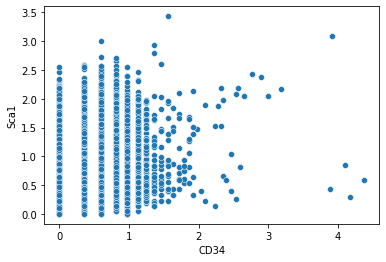

In [24]:
sns.scatterplot(data=t.T,x='CD34',y="Sca1")

In [45]:
t.shape

(8, 15330)

In [47]:
t = t.T
t.head()

,Sca1,CD150,CD48,CD16-32,CD105,CD41,CD71,CD34
mWT-AAACCCAAGTGATCGG,1.141346,0.791573,0.000000,1.214077,0.610476,0.813093,0.173609,0.350109
mWT-AAACCCACAAACCATC,2.096640,1.593778,1.016014,0.967950,1.154797,1.795002,0.387963,0.814333
mWT-AAACCCACACTGTCCT,0.587296,0.407370,0.178812,0.151221,1.176650,0.000000,2.093053,0.350109
mWT-AAACCCACAGCCATTA,1.382128,0.878800,1.169077,1.112080,0.960311,1.507104,0.450292,0.608921
mWT-AAACCCAGTACCTAAC,1.690425,2.403082,1.983133,1.164379,1.298595,2.568540,0.690819,0.350109


In [48]:
ckit = []
cmp = []
hsc = []
lsk = []
t_sca1_neg = t[t.Sca1<1.36]
t_sca1_pos = t[t.Sca1>=1.36]
cmp = t_sca1_neg[t_sca1_neg.CD34.between(0.58,5.89)]
cmp = cmp[cmp['CD16-32'].between(1.03,2.21)]
ckit = t_sca1_neg.loc[~t_sca1_neg.index.isin(cmp.index)]
hsc = t_sca1_pos[t_sca1_pos.CD150.between(1.24,3.67)]
hsc = hsc[hsc.CD48.between(0.00,1.08)]
lsk =  t_sca1_pos.loc[~t_sca1_pos.index.isin(hsc.index)]

In [49]:
print (cmp.shape)
print (ckit.shape)
print (hsc.shape)
print (lsk.shape)

(1717, 8)
(10101, 8)
(1422, 8)
(2090, 8)


In [50]:
df.head()

,barcodekey,Channel,n_genes,n_counts,percent_mito,scale,Group,louvain_labels,UMAP1,UMAP2
mNFIXko-AAACCCACATCCGGTG,mNFIXko-AAACCCACATCCGGTG,mNFIXko,2155,4737,5.552037,21.114865,one_group,4,2.174418,1.942060
mNFIXko-AAACCCAGTATCAGGG,mNFIXko-AAACCCAGTATCAGGG,mNFIXko,3995,15511,2.952743,6.447453,one_group,3,4.788786,9.221168
mNFIXko-AAACCCATCATGTCAG,mNFIXko-AAACCCATCATGTCAG,mNFIXko,1268,3395,4.918999,29.489826,one_group,7,2.255671,-1.557156
mNFIXko-AAACCCATCCACGTAA,mNFIXko-AAACCCATCCACGTAA,mNFIXko,4636,25841,2.778530,3.869819,one_group,5,13.748124,5.293617
mNFIXko-AAACCCATCGGACGTC,mNFIXko-AAACCCATCGGACGTC,mNFIXko,3965,16922,3.102470,5.909467,one_group,3,4.043426,9.439455


In [54]:
df['CMP'] = [x in cmp.index for x in df.index]
df['HSC'] = [x in hsc.index for x in df.index]

df['LSK'] = [x in lsk.index for x in df.index]

df['cKit'] = [x in ckit.index for x in df.index]

df.head()

,barcodekey,Channel,n_genes,n_counts,percent_mito,scale,Group,louvain_labels,UMAP1,UMAP2,CMP,HSC,LSK,cKit
mNFIXko-AAACCCACATCCGGTG,mNFIXko-AAACCCACATCCGGTG,mNFIXko,2155,4737,5.552037,21.114865,one_group,4,2.174418,1.942060,False,False,False,True
mNFIXko-AAACCCAGTATCAGGG,mNFIXko-AAACCCAGTATCAGGG,mNFIXko,3995,15511,2.952743,6.447453,one_group,3,4.788786,9.221168,True,False,False,False
mNFIXko-AAACCCATCATGTCAG,mNFIXko-AAACCCATCATGTCAG,mNFIXko,1268,3395,4.918999,29.489826,one_group,7,2.255671,-1.557156,True,False,False,False
mNFIXko-AAACCCATCCACGTAA,mNFIXko-AAACCCATCCACGTAA,mNFIXko,4636,25841,2.778530,3.869819,one_group,5,13.748124,5.293617,False,False,False,True
mNFIXko-AAACCCATCGGACGTC,mNFIXko-AAACCCATCGGACGTC,mNFIXko,3965,16922,3.102470,5.909467,one_group,3,4.043426,9.439455,True,False,False,False


In [60]:
c=['CMP','HSC','LSK','cKit']
for s,d in df.groupby('Channel'):
    print (s)
    for i in c:
        print (i,d[d[i]==True].shape[0]/d.shape[0])

mNFIXko
CMP 707
HSC 575
LSK 1019
cKit 4366
mWT
CMP 903
HSC 827
LSK 1015
cKit 4676


In [135]:
c=['CMP','HSC','LSK','cKit']
for s,d in df.groupby('Channel'):
    print (s)
    for i in c:
        print ("%s:%.2f"%((i,(d[d[i]==True].shape[0]*100)/d.shape[0]))+"%")

mNFIXko
CMP:10.60%
HSC:8.62%
LSK:15.28%
cKit:65.49%
mWT
CMP:12.17%
HSC:11.14%
LSK:13.68%
cKit:63.01%


In [94]:
df.to_csv("cluster_assignment.csv")

In [72]:
def get_label(r):
    c=['CMP','HSC','LSK','cKit']
    for i in c:
#         print (r[i])
        if r[i]:
            
            return i
df['label'] = df.apply(lambda r: get_label(r),axis=1)

In [73]:
df.head()

,barcodekey,Channel,n_genes,n_counts,percent_mito,scale,Group,louvain_labels,UMAP1,UMAP2,CMP,HSC,LSK,cKit,label
mNFIXko-AAACCCACATCCGGTG,mNFIXko-AAACCCACATCCGGTG,mNFIXko,2155,4737,5.552037,21.114865,one_group,4,2.174418,1.942060,False,False,False,True,cKit
mNFIXko-AAACCCAGTATCAGGG,mNFIXko-AAACCCAGTATCAGGG,mNFIXko,3995,15511,2.952743,6.447453,one_group,3,4.788786,9.221168,True,False,False,False,CMP
mNFIXko-AAACCCATCATGTCAG,mNFIXko-AAACCCATCATGTCAG,mNFIXko,1268,3395,4.918999,29.489826,one_group,7,2.255671,-1.557156,True,False,False,False,CMP
mNFIXko-AAACCCATCCACGTAA,mNFIXko-AAACCCATCCACGTAA,mNFIXko,4636,25841,2.778530,3.869819,one_group,5,13.748124,5.293617,False,False,False,True,cKit
mNFIXko-AAACCCATCGGACGTC,mNFIXko-AAACCCATCGGACGTC,mNFIXko,3965,16922,3.102470,5.909467,one_group,3,4.043426,9.439455,True,False,False,False,CMP


In [88]:
rna_df.head()

,mNFIXko-AAACCCACATCCGGTG,mNFIXko-AAACCCAGTATCAGGG,mNFIXko-AAACCCATCATGTCAG,mNFIXko-AAACCCATCCACGTAA,mNFIXko-AAACCCATCGGACGTC,mNFIXko-AAACCCATCTGGGCGT,mNFIXko-AAACGAAAGGAAGAAC,mNFIXko-AAACGAACACACCTGG,mNFIXko-AAACGAACAGGCCCTA,mNFIXko-AAACGAAGTGTCTTCC,...,mWT-TTTGGTTTCCATCACC,mWT-TTTGGTTTCGTCGCTT,mWT-TTTGGTTTCTATCGTT,mWT-TTTGTTGAGAGAAGGT,mWT-TTTGTTGCAATCGCAT,mWT-TTTGTTGCACACGGTC,mWT-TTTGTTGGTCGAGCTC,mWT-TTTGTTGGTCGTGATT,mWT-TTTGTTGTCATCGACA,mWT-TTTGTTGTCATTGTGG
RP1,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
GM37323,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
MRPL15,0.0,3.012705,0.0,3.187134,1.932892,0.0,2.761410,2.383029,3.317662,2.592335,...,3.557721,3.256535,3.050191,3.062412,2.306654,2.446943,2.907203,0.0,0.000000,2.072594
LYPLA1,0.0,0.000000,0.0,0.000000,0.000000,0.0,1.781829,0.000000,0.000000,1.633216,...,1.899197,0.000000,2.042059,0.000000,2.306654,0.000000,2.267244,0.0,3.230624,2.072594
GM37988,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000


In [95]:
g="GM47283"
rna_df = rna_df.T

In [96]:
rna_df.head()

,RP1,GM37323,MRPL15,LYPLA1,GM37988,TCEA1,ATP6V1H,OPRK1,RB1CC1,4732440D04RIK,...,CR974586.5,AC132444.1,CSPRS,AC132444.6,AC125149.3,AC125149.2,AC168977.1,AC149090.1,CAAA01118383.1,CAAA01147332.1
mNFIXko-AAACCCACATCCGGTG,0.0,0.0,0.000000,0.0,0.0,3.096250,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,3.096250,0.000000,0.0
mNFIXko-AAACCCAGTATCAGGG,0.0,0.0,3.012705,0.0,0.0,0.000000,0.000000,0.0,3.288022,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,2.007872,0.000000,0.0
mNFIXko-AAACCCATCATGTCAG,0.0,0.0,0.000000,0.0,0.0,0.000000,3.417393,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3.417393,4.094006,0.000000,0.0
mNFIXko-AAACCCATCCACGTAA,0.0,0.0,3.187134,0.0,0.0,2.167869,0.000000,0.0,2.167869,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,2.167869,1.583057,0.0
mNFIXko-AAACCCATCGGACGTC,0.0,0.0,1.932892,0.0,0.0,2.550923,0.000000,0.0,2.550923,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,1.932892,0.0


In [97]:
df.head()antibody_df.sparse.to_dense()

,barcodekey,Channel,n_genes,n_counts,percent_mito,scale,Group,louvain_labels,UMAP1,UMAP2,CMP,HSC,LSK,cKit,label
mNFIXko-AAACCCACATCCGGTG,mNFIXko-AAACCCACATCCGGTG,mNFIXko,2155,4737,5.552037,21.114865,one_group,4,2.174418,1.942060,False,False,False,True,cKit
mNFIXko-AAACCCAGTATCAGGG,mNFIXko-AAACCCAGTATCAGGG,mNFIXko,3995,15511,2.952743,6.447453,one_group,3,4.788786,9.221168,True,False,False,False,CMP
mNFIXko-AAACCCATCATGTCAG,mNFIXko-AAACCCATCATGTCAG,mNFIXko,1268,3395,4.918999,29.489826,one_group,7,2.255671,-1.557156,True,False,False,False,CMP
mNFIXko-AAACCCATCCACGTAA,mNFIXko-AAACCCATCCACGTAA,mNFIXko,4636,25841,2.778530,3.869819,one_group,5,13.748124,5.293617,False,False,False,True,cKit
mNFIXko-AAACCCATCGGACGTC,mNFIXko-AAACCCATCGGACGTC,mNFIXko,3965,16922,3.102470,5.909467,one_group,3,4.043426,9.439455,True,False,False,False,CMP


In [102]:
df['g'] = rna_df[g].sparse.to_dense()

In [99]:
df.head()

,barcodekey,Channel,n_genes,n_counts,percent_mito,scale,Group,louvain_labels,UMAP1,UMAP2,CMP,HSC,LSK,cKit,label,g
mNFIXko-AAACCCACATCCGGTG,mNFIXko-AAACCCACATCCGGTG,mNFIXko,2155,4737,5.552037,21.114865,one_group,4,2.174418,1.942060,False,False,False,True,cKit,0.000000
mNFIXko-AAACCCAGTATCAGGG,mNFIXko-AAACCCAGTATCAGGG,mNFIXko,3995,15511,2.952743,6.447453,one_group,3,4.788786,9.221168,True,False,False,False,CMP,2.007872
mNFIXko-AAACCCATCATGTCAG,mNFIXko-AAACCCATCATGTCAG,mNFIXko,1268,3395,4.918999,29.489826,one_group,7,2.255671,-1.557156,True,False,False,False,CMP,0.000000
mNFIXko-AAACCCATCCACGTAA,mNFIXko-AAACCCATCCACGTAA,mNFIXko,4636,25841,2.778530,3.869819,one_group,5,13.748124,5.293617,False,False,False,True,cKit,0.000000
mNFIXko-AAACCCATCGGACGTC,mNFIXko-AAACCCATCGGACGTC,mNFIXko,3965,16922,3.102470,5.909467,one_group,3,4.043426,9.439455,True,False,False,False,CMP,0.000000


In [104]:
for s,d in df.groupby('label'):
    for s2,dd in d.groupby('Channel'):
        print (s,s2,dd.describe())

CMP mNFIXko            n_genes      n_counts  percent_mito       scale  louvain_labels  \
count   707.000000    707.000000    707.000000  707.000000      707.000000   
mean   3945.072136  16885.325318      3.681561    8.644608        6.183876   
std    1058.148479   7616.161739      1.795900    8.870808        3.634524   
min     558.000000   1097.000000      0.727523    2.400384        1.000000   
25%    3346.500000  11413.500000      2.679344    4.530424        3.000000   
50%    4165.000000  17315.000000      3.435238    5.775673        5.000000   
75%    4652.500000  22074.500000      4.318024    8.762436        9.000000   
max    5972.000000  41662.000000     19.499842   91.659028       13.000000   

            UMAP1       UMAP2           g  
count  707.000000  707.000000  707.000000  
mean     6.477308    6.836975    0.516236  
std      3.004953    3.207358    0.927466  
min      1.660406   -5.168844    0.000000  
25%      4.430294    4.809238    0.000000  
50%      5.684554    

In [89]:

rna_ann =  AnnData(X=rna_df,obs=df[['Channel','label']])
for i in c:
    print (i)
    tmp = rna_ann[rna_ann.obs["label"] == i, :]
    pg.de_analysis(tmp,"Channel")
    pg.volcano(tmp,"mWT")
    x = pd.DataFrame(tmp.varm['de_res'])
    a=x[x.columns[x.columns.str.contains("WT")]]
    a.index = rna_df.index.tolist()
    a.to_csv("%s_DEG.csv"%(i))
    plt.savefig("%ss_DEG.volcano.pdf"%(i),bbox_inches='tight')

In [ ]:
plt.savefig("xvol.png",bbox_inches='tight')

pg.de_analysis(tmp,"Channel")
marker_dict = pg.markers(tmp)
marker_dict['1']['up'].sort_values(by='log2FC', ascending=False)
pg.volcano(marker_dict,  dpi=200)

<Figure size 432x288 with 0 Axes>

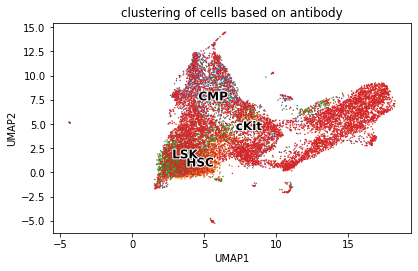

<Figure size 432x288 with 0 Axes>

In [116]:
plt.figure()
sc.pl.scatter(ann, x="UMAP1",y="UMAP2",color='label', legend_loc='on data',legend_fontsize=12, legend_fontoutline=2,frameon=False,title='clustering of cells based on antibody',save="%s_Scapy_UMAP.pdf"%("cell_cluster"))
plt.savefig("%s_Scapy_UMAP.png"%("cell_cluster"),bbox_inches='tight')

... storing 'Channel' as categorical
... storing 'label' as categorical


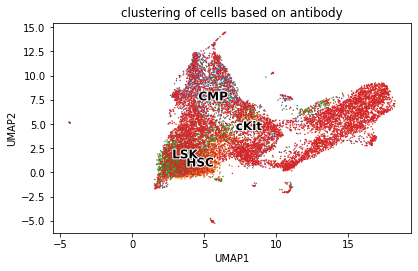

<Figure size 432x288 with 0 Axes>

In [78]:
from anndata import AnnData
ann = AnnData(X=df[['UMAP1','UMAP2']],obs=df[['Channel','label']])
import scanpy as sc
from matplotlib import rcParams
sc.pl.scatter(ann, x="UMAP1",y="UMAP2",color='label', legend_loc='on data',legend_fontsize=12, legend_fontoutline=2,frameon=False,title='clustering of cells based on antibody')
plt.savefig("%s_Scapy_UMAP.png"%("cell_cluster"),bbox_inches='tight')

<Figure size 432x288 with 0 Axes>

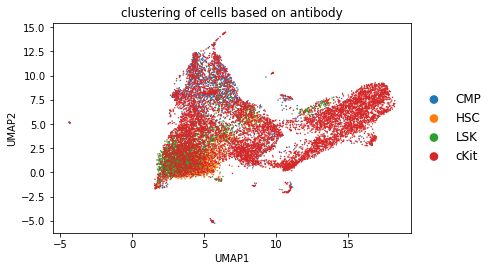

<Figure size 432x288 with 0 Axes>

In [115]:
plt.figure()
sc.pl.scatter(ann, x="UMAP1",y="UMAP2",color='label',legend_fontsize=12, legend_fontoutline=2,frameon=False,title='clustering of cells based on antibody',save="%s_Scapy_UMAP.pdf"%("cell_cluster_legend"))
plt.savefig("%s_Scapy_UMAP.png"%("cell_cluster_legend"),bbox_inches='tight')

<Figure size 432x288 with 0 Axes>

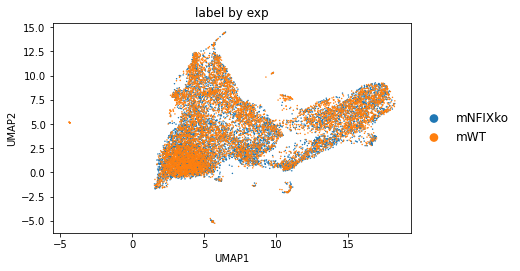

<Figure size 432x288 with 0 Axes>

In [113]:
plt.figure()
sc.pl.scatter(ann, x="UMAP1",y="UMAP2",color='Channel',legend_fontsize=12, legend_fontoutline=2,frameon=False,title='label by exp',save="%s_Scapy_UMAP.pdf"%("label_by_exp"))
plt.savefig("%s_Scapy_UMAP.png"%("label_by_exp"),bbox_inches='tight')

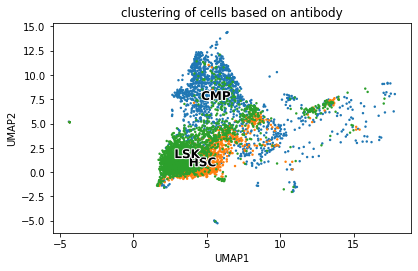

In [112]:
# plt.figure(figsize=(20,20))
tmp = ann[ann.obs["label"] != "cKit", :]
sc.pl.scatter(tmp, x="UMAP1",y="UMAP2",color='label',legend_loc='on data',legend_fontsize=12, legend_fontoutline=2,frameon=False,title='clustering of cells based on antibody',save="%s_Scapy_UMAP.pdf"%("cell_cluster_legend_rmckit"))
# plt.savefig("%s_Scapy_UMAP.png"%("cell_cluster_legend_rmckit"),bbox_inches='tight')

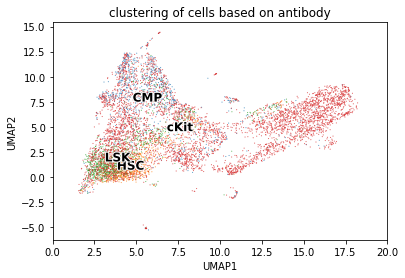

In [133]:
fig,ax = plt.subplots()
ax.set_xlim([0, 20])
tmp = ann[ann.obs["Channel"] == "mWT", :]
sc.pl.scatter(tmp, x="UMAP1",y="UMAP2",color='label',legend_loc='on data',alpha=0.7,size=5,
              legend_fontsize=12, legend_fontoutline=2,frameon=False,title='clustering of cells based on antibody',save="WT_UMAP.pdf",ax=ax)

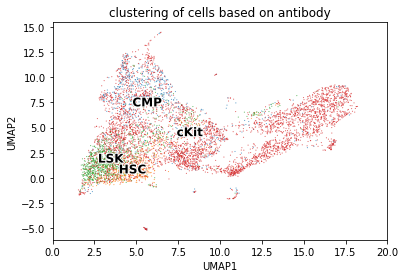

In [132]:
fig,ax = plt.subplots()
ax.set_xlim([0, 20])
tmp = ann[ann.obs["Channel"] == "mNFIXko", :]
sc.pl.scatter(tmp, x="UMAP1",y="UMAP2",color='label',legend_loc='on data',alpha=0.7,size=5,
              legend_fontsize=12, legend_fontoutline=2,frameon=False,title='clustering of cells based on antibody',save="KO_UMAP.pdf",ax=ax)

In [92]:
sc.tl.embedding_density(adata, basis='umap', groupby='phase')

'0.36.0'

In [117]:
help(sc.pl.scatter)

Help on function scatter in module scanpy.plotting._anndata:

scatter(adata: anndata._core.anndata.AnnData, x: Union[str, NoneType] = None, y: Union[str, NoneType] = None, color: Union[str, Collection[str]] = None, use_raw: Union[bool, NoneType] = None, layers: Union[str, Collection[str]] = None, sort_order: bool = True, alpha: Union[float, NoneType] = None, basis: Union[Literal['pca', 'tsne', 'umap', 'diffmap', 'draw_graph_fr'], NoneType] = None, groups: Union[str, Iterable[str]] = None, components: Union[str, Collection[str]] = None, projection: Literal['2d', '3d'] = '2d', legend_loc: str = 'right margin', legend_fontsize: Union[int, float, Literal['xx-small', 'x-small', 'small', 'medium', 'large', 'x-large', 'xx-large'], NoneType] = None, legend_fontweight: Union[int, Literal['light', 'normal', 'medium', 'semibold', 'bold', 'heavy', 'black'], NoneType] = None, legend_fontoutline: float = None, color_map: Union[str, matplotlib.colors.Colormap] = None, palette: Union[cycler.Cycler, ma